In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.colors as mcolors
from scipy import integrate
from scipy import optimize
from scipy import interpolate
from scipy import special
from mpl_toolkits import mplot3d
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable 
%pylab inline 
%config InlineBackend.figure_format = 'svg' 
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams['text.usetex'] = True
plt.rcParams['mathtext.fontset'] = 'cm'

Populating the interactive namespace from numpy and matplotlib


In [2]:
CDM_0_001 = np.loadtxt('./output/CDM00_perturbations_k0_s.dat')
CDM_0_01 = np.loadtxt('./output/CDM00_perturbations_k1_s.dat')
CDM_0_1 = np.loadtxt('./output/CDM00_perturbations_k2_s.dat')

MDM_0_001 = np.loadtxt('./output/Mimetic00_perturbations_k0_s.dat')
MDM_0_01 = np.loadtxt('./output/Mimetic00_perturbations_k1_s.dat')
MDM_0_1 = np.loadtxt('./output/Mimetic00_perturbations_k2_s.dat')

MDM_0_001_Match = np.loadtxt('./output/MDM00_perturbations_k0_s.dat')
MDM_0_01_Match = np.loadtxt('./output/MDM00_perturbations_k1_s.dat')
MDM_0_1_Match = np.loadtxt('./output/MDM00_perturbations_k2_s.dat')

In [3]:
# Column order:
# 
# 0  tau
# 1  a
# 2  delta_g
# 3  theta_g
# 4  shear_g
# 5  pol0_g
# 6  pol1_g
# 7  pol2_g
# 8  delta_b
# 9  theta_b
# 10 psi
# 11 phi
# 12 delta_ur
# 13 theta_ur
# 14 shear_ur
# 15 delta_cdm / delta_mimetic
# 16 theta_cdm / theta_mimetic

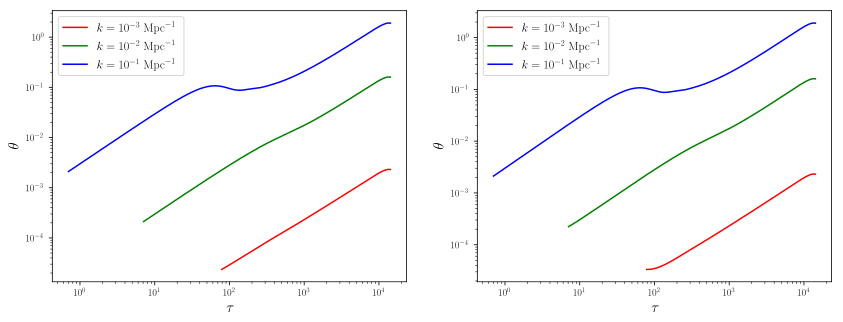

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))

#################################################

ax[0].loglog(CDM_0_001[:,0], CDM_0_001[:,-1], color='r', label=r'$k=10^{-3}\ \mathrm{Mpc}^{-1}$')
ax[0].loglog(CDM_0_01[:,0], CDM_0_01[:,-1], color='g', label=r'$k=10^{-2}\ \mathrm{Mpc}^{-1}$')
ax[0].loglog(CDM_0_1[:,0], CDM_0_1[:,-1], color='b', label=r'$k=10^{-1}\ \mathrm{Mpc}^{-1}$')

ax[0].set_xlabel(r'$\tau$', fontsize=15)
ax[0].set_ylabel(r'$\theta$', fontsize=15)

ax[0].legend(loc=0, fontsize=12)

#################################################

ax[1].loglog(MDM_0_001[:,0], MDM_0_001[:,-1], color='r', label=r'$k=10^{-3}\ \mathrm{Mpc}^{-1}$')
ax[1].loglog(MDM_0_01[:,0], MDM_0_01[:,-1], color='g', label=r'$k=10^{-2}\ \mathrm{Mpc}^{-1}$')
ax[1].loglog(MDM_0_1[:,0], MDM_0_1[:,-1], color='b', label=r'$k=10^{-1}\ \mathrm{Mpc}^{-1}$')

ax[1].set_xlabel(r'$\tau$', fontsize=15)
ax[1].set_ylabel(r'$\theta$', fontsize=15)

ax[1].legend(loc=0, fontsize=12)

#################################################

show()

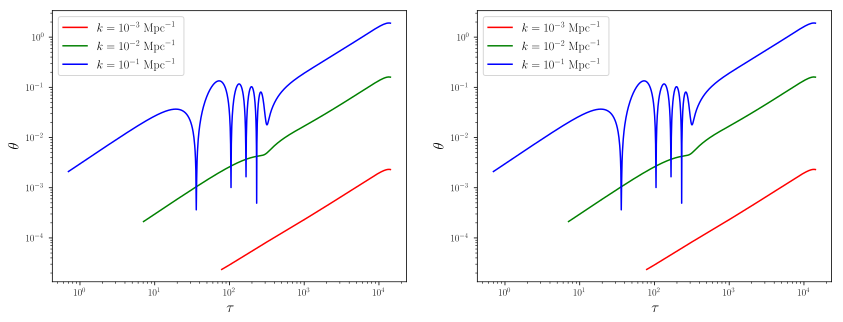

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))

index_col = 9

#################################################

ax[0].loglog(CDM_0_001[:,0], abs(CDM_0_001[:,index_col]), color='r', label=r'$k=10^{-3}\ \mathrm{Mpc}^{-1}$')
ax[0].loglog(CDM_0_01[:,0], abs(CDM_0_01[:,index_col]), color='g', label=r'$k=10^{-2}\ \mathrm{Mpc}^{-1}$')
ax[0].loglog(CDM_0_1[:,0], abs(CDM_0_1[:,index_col]), color='b', label=r'$k=10^{-1}\ \mathrm{Mpc}^{-1}$')

ax[0].set_xlabel(r'$\tau$', fontsize=15)
ax[0].set_ylabel(r'$\theta$', fontsize=15)

ax[0].legend(loc=0, fontsize=12)

#################################################

ax[1].loglog(MDM_0_001_Match[:,0], abs(MDM_0_001_Match[:,index_col]), color='r', label=r'$k=10^{-3}\ \mathrm{Mpc}^{-1}$')
ax[1].loglog(MDM_0_01_Match[:,0], abs(MDM_0_01_Match[:,index_col]), color='g', label=r'$k=10^{-2}\ \mathrm{Mpc}^{-1}$')
ax[1].loglog(MDM_0_1_Match[:,0], abs(MDM_0_1_Match[:,index_col]), color='b', label=r'$k=10^{-1}\ \mathrm{Mpc}^{-1}$')

ax[1].set_xlabel(r'$\tau$', fontsize=15)
ax[1].set_ylabel(r'$\theta$', fontsize=15)

ax[1].legend(loc=0, fontsize=12)

#################################################

show()

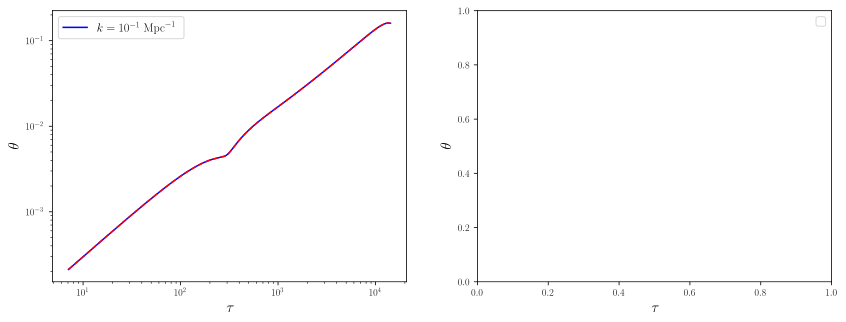

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))

index_col = 9

#################################################

#ax[0].loglog(CDM_0_001[:,0], abs(CDM_0_001[:,index_col]), color='r', label=r'$k=10^{-3}\ \mathrm{Mpc}^{-1}$')
#ax[0].loglog(CDM_0_01[:,0], abs(CDM_0_01[:,index_col]), color='g', label=r'$k=10^{-2}\ \mathrm{Mpc}^{-1}$')
ax[0].loglog(CDM_0_01[:,0], abs(CDM_0_01[:,index_col]), color='b', label=r'$k=10^{-1}\ \mathrm{Mpc}^{-1}$')

ax[0].set_xlabel(r'$\tau$', fontsize=15)
ax[0].set_ylabel(r'$\theta$', fontsize=15)

ax[0].legend(loc=0, fontsize=12)

#################################################

#ax[1].loglog(MDM_0_001_Match[:,0], abs(MDM_0_001_Match[:,index_col]), color='r', label=r'$k=10^{-3}\ \mathrm{Mpc}^{-1}$')
#ax[1].loglog(MDM_0_01_Match[:,0], abs(MDM_0_01_Match[:,index_col]), color='g', label=r'$k=10^{-2}\ \mathrm{Mpc}^{-1}$')
ax[0].loglog(MDM_0_01_Match[:,0], abs(MDM_0_01_Match[:,index_col]), linestyle='--', color='r', label=r'$k=10^{-1}\ \mathrm{Mpc}^{-1}$')

ax[1].set_xlabel(r'$\tau$', fontsize=15)
ax[1].set_ylabel(r'$\theta$', fontsize=15)

ax[1].legend(loc=0, fontsize=12)

#################################################

show()